# Visualizing document vector clusters
____________________________________
This code generates graphs of the document vectors made by doc2vec.py, to determine if the clustering pattern observed with mean-shift clustering (almost all abstracts in one cluster and only 1 or 2 in all other clusters) is reflective of the underlying pattern of the data, or if it reflects a silent error in the clustering code.

## Dimensionality reduction
Given that the document vectors are 50-dimensional, we need to perform some kind of dimensionality reduction on the data before plotting. Here, we're going to use both [tSNE](https://yinsenm.github.io/2015/01/01/High-Dimensional-Data-Visualizing-using-tSNE/) and PCA, and compare the results.

In [2]:
# Import packages
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np 

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Read in the document vectors 
# These are docvecs from documents containing special characters
docvecs = pd.read_csv('../data/first_manuscript_data/clustering_pipeline_output/doc2vec_vectors.csv', index_col=0, engine='python')
docvecs.head()

,vector_dim0,vector_dim1,vector_dim2,vector_dim3,vector_dim4,vector_dim5,vector_dim6,vector_dim7,vector_dim8,vector_dim9,...,vector_dim40,vector_dim41,vector_dim42,vector_dim43,vector_dim44,vector_dim45,vector_dim46,vector_dim47,vector_dim48,vector_dim49
PMID18402723_abstract.txt,-0.129086,0.650693,-0.088430,-0.065803,-1.001440,-0.112901,0.060875,1.340077,-0.859160,-0.441170,...,1.019848,-0.137158,0.686309,-0.231976,0.976090,0.613285,-0.070006,-0.220025,0.051589,0.261808
PMID19214562_abstract.txt,-0.456743,-0.118816,0.415290,0.623608,0.533538,-0.410313,0.865479,0.266716,-0.511132,-0.395730,...,0.647158,0.102877,0.141661,-0.368813,0.814127,0.129849,-0.016899,0.496250,0.171736,0.018547
PMID30176884_abstract.txt,0.232214,1.241996,1.385572,0.097348,-0.477107,0.799544,0.320565,1.024906,-1.740750,-0.018401,...,0.032785,-0.142508,-0.293224,-1.693219,1.352372,0.917716,1.649895,-0.091840,0.480721,-0.952170
PMID20854394_abstract.txt,-1.018279,-0.503299,0.446571,0.017640,-1.738541,-0.089328,0.975067,0.653705,-0.927264,0.094875,...,1.081211,0.791300,0.886624,-0.775268,0.874677,-0.087801,-1.110482,-1.229061,0.066304,0.698181
PMID30076223_abstract.txt,-0.280104,0.183829,-0.926360,-0.016239,-0.596970,-0.006804,0.992842,0.242217,0.345840,-0.704596,...,1.017986,1.645920,-0.074721,-0.835617,1.832034,0.818003,-0.348022,0.288649,0.443054,0.271817


In [4]:
# tSNE
# This kills the jupyter kernel, so I ran the following lines in hpcc devnode python interpreter:
"""
from sklearn.manifold import TSNE
import pandas as pd

docvecs = pd.read_csv('../data/first_manuscript_data/clustering_pipeline_output/doc2vec_vectors.csv', index_col=0, engine='python')
docvecs.head()

tsne = TSNE() # Initialize model
tsne_reduction = tsne.fit_transform(docvecs.to_numpy(copy=True)) # Fit the model and transform the data

tsne_output = pd.DataFrame(tsne_reduction, columns=['component_1', 'component_2'])
tsne_output.to_csv('../data/first_manuscript_data/clustering_pipeline_output/tsne_output.csv', index=False)
"""

In [13]:
# Read in tSNE results
tsne_results = pd.read_csv('../data/first_manuscript_data/clustering_pipeline_output/tsne_output.csv')
tsne_results.head()

,component_1,component_2
0,-46.118412,-19.077300
1,-5.112287,-1.066877
2,37.962720,25.067880
3,21.566540,41.298670
4,-37.030200,25.827230


Text(0, 0.5, 'Component 2')

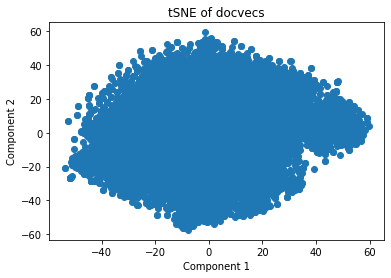

In [15]:
# Plot tSNE
plt.scatter(tsne_results.component_1, tsne_results.component_2)
plt.title('tSNE of docvecs')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [5]:
# PCA
pca = PCA(n_components=2) # Initialize model 
pca_reduction = pca.fit_transform(docvecs.to_numpy(copy=True)) # Fit model and transform data

In [6]:
pca_reduction.shape

(8673, 2)

In [10]:
pc1_var, pc2_var = pca.explained_variance_ratio_

Text(0, 0.5, 'PC2 - 7.09%')

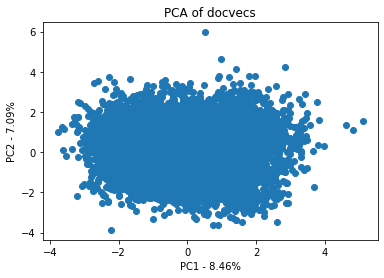

In [12]:
# Plot PCA
pca_plotting_data = pca_reduction.transpose()
plt.scatter(pca_plotting_data[0], pca_plotting_data[1])
plt.title('PCA of docvecs')
plt.xlabel(f'PC1 - {pc1_var*100:.2f}%')
plt.ylabel(f'PC2 - {pc2_var*100:.2f}%')

This is consistent with the result from mean-shift clustering, and isn't necessarily unexpected -- the documents from the PubMed searches are pretty similar. However, I would sort of expect that, given a set of very similar documents, and no "outgroup" documents, that the docvecs would be able to have more nuance.